# Homework 8

## Problem 2

## 2.1 Import libraries

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.style as style
style.use('bmh')

## 2.2 Read data and visualize some distributions

   digit  intensity  symmetry
0    6.0   0.341092 -4.528937
1    5.0   0.444131 -5.496812
2    4.0   0.231002 -2.886750
3    7.0   0.200275 -3.534375
4    3.0   0.291936 -4.352062

shape of training data:  (7291, 3)


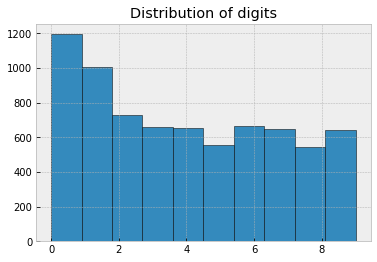

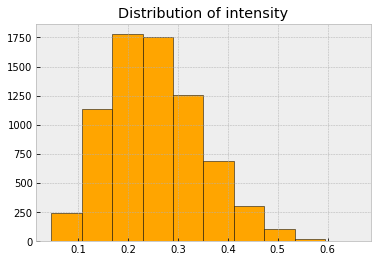

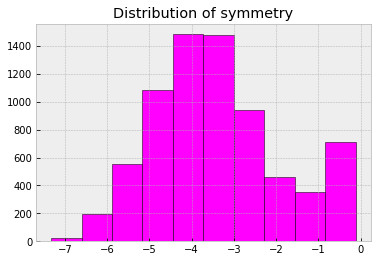

In [2]:
train = pd.read_csv('features.train', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)
print(train.head(5))

print("\nshape of training data: ", train.shape)

plt.hist(train['digit'], edgecolor='black')
plt.title('Distribution of digits')
plt.show()

plt.hist(train['intensity'], color='orange', edgecolor='black')
plt.title('Distribution of intensity')
plt.show()

plt.hist(train['symmetry'], color='magenta', edgecolor='black')
plt.title('Distribution of symmetry')
plt.show()


## 2.3 Prepare data

Let's examine the training data and re-label data for **x-vs-all**.

In [3]:
# Reading in data with np.loadtxt instead of Pandas
TRAIN_DATA = np.loadtxt('features.train')
print("First five rows of our training data:")
print(TRAIN_DATA[:5,:])
print(TRAIN_DATA.dtype)

# training data ignoring 0-th column which contains the digit labels
X_TRAIN = TRAIN_DATA[:, 1:]

# 0-th column contains digit labels
DIGIT_LABELS = TRAIN_DATA[:, 0]

# number of training points
N_TRAIN = X_TRAIN.shape[0]

First five rows of our training data:
[[ 6.          0.3410918  -4.5289375 ]
 [ 5.          0.44413086 -5.4968125 ]
 [ 4.          0.23100195 -2.88675   ]
 [ 7.          0.20027539 -3.534375  ]
 [ 3.          0.29193555 -4.3520625 ]]
float64


## 2.4 function get_labels

This function creates new labels $y$ according to the problem statement.

In [4]:
def get_labels(x, digit_labels):
    '''
    - Takes integer 'x' (digit 0-9)
    - Takes labels
    - Returns new labels
      where the label is 1 for digit == x, and -1 otherwise.
    '''
    y = []
    for d in digit_labels:
        if d == x:
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)

## 2.5 Setting up the classifier

For the **Support Vector Machine** we will use the [SVM class from scikit learn](http://scikit-learn.org/stable/modules/svm.html) (which internally uses `libsvm`).

In [5]:
# classifier clf with the parameters as stated by the homework problem
clf_poly = svm.SVC(C = 0.01, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)

## 2.6 Compute in-sample error $E_{in}$

In [6]:
# compute in-sample error E_in for x-vs-all
def get_E_in_x_vs_all(x, DIGIT_LABELS, X_TRAIN):
    '''
    - Takes integer x
    - Takes vector DIGIT_LABELS containing true digit labels
    - Takes matrix X_TRAIN with features intensity and symmetry
    - Returns in-sample error E_in for binary classifier with label
      y = 1 if digit == x, otherwise y = -1
    '''
    y_x_vs_all = get_labels(x, DIGIT_LABELS)
    N_TRAIN = X_TRAIN.shape[0]

    # fit and predict
    clf_poly.fit(X_TRAIN, y_x_vs_all)
    y_predict_x_vs_all = clf_poly.predict(X_TRAIN)

    # calculate E_in
    E_in_x_vs_all = sum(y_predict_x_vs_all != y_x_vs_all) / N_TRAIN
    return E_in_x_vs_all


# Compute the digit among [0,2,4,6,8] with the highest E_in
max_error = -1
max_digit = None
selected_classifier_problem_2 = None
error_values = []

for digit in [0,2,4,6,8]:
    current_E_in = get_E_in_x_vs_all(digit, DIGIT_LABELS, X_TRAIN)
    error_values.append(current_E_in)
    print("E_in_{}_vs_all = {}".format(digit, current_E_in))
    if current_E_in > max_error:
        max_error = current_E_in
        max_digit = digit
        
print("\nMaximum error {} is achieved for digit {}".format(max_error, max_digit))

E_in_0_vs_all = 0.10588396653408312
E_in_2_vs_all = 0.10026059525442327
E_in_4_vs_all = 0.08942531888629818
E_in_6_vs_all = 0.09107118365107666
E_in_8_vs_all = 0.07433822520916199

Maximum error 0.10588396653408312 is achieved for digit 0


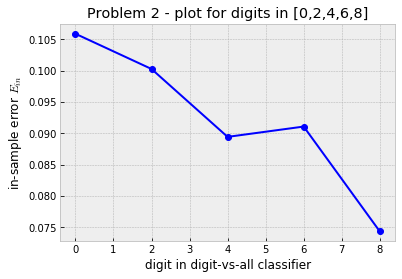

In [7]:
plt.plot([0,2,4,6,8], error_values, 'bo-')
plt.title('Problem 2 - plot for digits in [0,2,4,6,8]')
plt.xlabel('digit in digit-vs-all classifier')
plt.ylabel('in-sample error $E_{in}$')
plt.show()

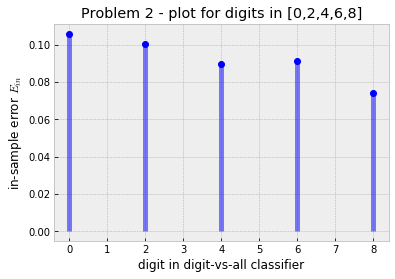

In [8]:
# plot with vertical bars

fig, ax = plt.subplots(1, 1)    
ax.vlines([0,2,4,6,8], 0, error_values, colors='b', lw=5, alpha=0.5)
plt.plot([0,2,4,6,8], error_values, 'bo')
plt.title('Problem 2 - plot for digits in [0,2,4,6,8]')
plt.xlabel('digit in digit-vs-all classifier')
plt.ylabel('in-sample error $E_{in}$')
plt.show()

## Result for Problem 2

The classifier **0-vs-all** achieves the highest in-sample-error with $E_{in} = 10.6\%$ among the classifiers using digits [0, 2, 4, 6, 8] only.

## 2.7 Number of support vectors

Let's determine the number of support vectors for the classifier **0-vs-all** because we will need it for **Problem 4**.

In [9]:
y_0_vs_all = get_labels(0, DIGIT_LABELS)
selected_classifier_problem_2 = clf_poly.fit(X_TRAIN, y_0_vs_all)
num_support_vectors_problem_2 = sum(selected_classifier_problem_2.n_support_)
print("number of support vectors of classifier chosen in problem 2: ", num_support_vectors_problem_2)

number of support vectors of classifier chosen in problem 2:  2179


## 2.8 Number of support vectors for each classifier

In [10]:
d_values = []
num_support_vectors_values = []

for d in range(0, 10):
    clf_poly.fit(X_TRAIN,  get_labels(d, DIGIT_LABELS))
    num_support_vectors = sum(clf_poly.n_support_)
    print("d={} vs all yields {} support vectors".format(d, num_support_vectors))
    
    d_values.append(d)
    num_support_vectors_values.append(num_support_vectors)

d=0 vs all yields 2179 support vectors
d=1 vs all yields 386 support vectors
d=2 vs all yields 1970 support vectors
d=3 vs all yields 1950 support vectors
d=4 vs all yields 1856 support vectors
d=5 vs all yields 1585 support vectors
d=6 vs all yields 1893 support vectors
d=7 vs all yields 1704 support vectors
d=8 vs all yields 1776 support vectors
d=9 vs all yields 1978 support vectors


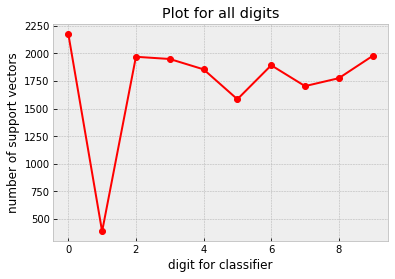

In [11]:
plt.plot(d_values, num_support_vectors_values, 'ro-')
plt.xlabel('digit for classifier')
plt.ylabel('number of support vectors')
plt.title('Plot for all digits')
plt.show()

## 2.9 In-sample error $E_{in}$ for each classifier

In [12]:
d_values = []
E_in_values = []

for d in range(0,10):
    y_d_vs_all_label = get_labels(d, DIGIT_LABELS)
    clf_poly.fit(X_TRAIN, y_d_vs_all_label)
    y_predict = clf_poly.predict(X_TRAIN)
    current_E_in = np.sum(y_predict != y_d_vs_all_label) / X_TRAIN.shape[0]
    print("E_in_{}_vs_all = {}".format(d, current_E_in))
    
    d_values.append(d)
    E_in_values.append(current_E_in)

E_in_0_vs_all = 0.10588396653408312
E_in_1_vs_all = 0.014401316691811822
E_in_2_vs_all = 0.10026059525442327
E_in_3_vs_all = 0.09024825126868742
E_in_4_vs_all = 0.08942531888629818
E_in_5_vs_all = 0.07625840076807022
E_in_6_vs_all = 0.09107118365107666
E_in_7_vs_all = 0.08846523110684405
E_in_8_vs_all = 0.07433822520916199
E_in_9_vs_all = 0.08832807570977919


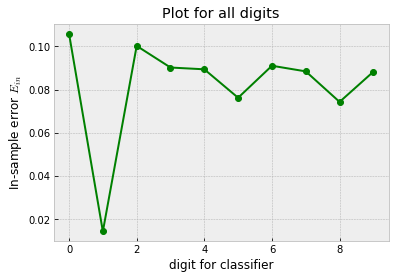

In [13]:
plt.plot(d_values, E_in_values, 'go-')
plt.xlabel('digit for classifier')
plt.ylabel('In-sample error $E_{in}$')
plt.title('Plot for all digits')
plt.show()

# Problem 3

## 3.1 Compute $E_{in}$ for classifiers using digits [1, 3, 5, 7, 9]

Determine which of the classifiers using digits [1, 3, 5, 7, 9] achieves the lowest $E_{in}$.

In [14]:
min_error = 2**64
min_digit = None
error_values = []

for digit in [1,3,5,7,9]:
    current_E_in = get_E_in_x_vs_all(digit, DIGIT_LABELS, X_TRAIN) 
    error_values.append(current_E_in)
    
    print("E_in_{}_vs_all = {}".format(digit, current_E_in))
    if current_E_in < min_error:
        min_error = current_E_in
        min_digit = digit
    
print("\nMinimum error {} is achieved for digit {}".format(min_error, min_digit))

E_in_1_vs_all = 0.014401316691811822
E_in_3_vs_all = 0.09024825126868742
E_in_5_vs_all = 0.07625840076807022
E_in_7_vs_all = 0.08846523110684405
E_in_9_vs_all = 0.08832807570977919

Minimum error 0.014401316691811822 is achieved for digit 1


## 3.2 Result for Problem 3

The classifier **1-vs-all** achieves the highest in-sample-error with $E_{in} = 1.4\%$ among the classifiers using digits [1, 3, 5, 7, 9] only.

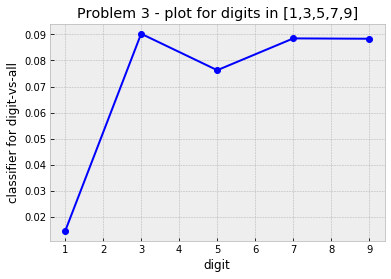

In [15]:
plt.plot([1,3,5,7,9], error_values, 'bo-')
plt.title('Problem 3 - plot for digits in [1,3,5,7,9]')
plt.xlabel('digit')
plt.ylabel('classifier for digit-vs-all')
plt.show()

## 3.3 Number of support vectors

Let's determine the number of support vectors for the classifier **1-vs-all** because we will need it for **Problem 4**.

In [16]:
y_1_vs_all = get_labels(1, DIGIT_LABELS)
selected_classifier_problem_3 = clf_poly.fit(X_TRAIN, y_1_vs_all)
num_support_vectors_problem_3 = sum(selected_classifier_problem_3.n_support_)
print("number of support vectors of classifier chosen in problem 3: ", num_support_vectors_problem_3)

number of support vectors of classifier chosen in problem 3:  386


# Problem 4

We compare the number of support vectors of the classifiers from Problem 2 and 3 by calculating the difference, and determine which of the given multiple choice answers is closest.

In [17]:
diff_support_vectors_p1_p2 = abs(num_support_vectors_problem_3 - num_support_vectors_problem_2)
print("the number of support vectors from problem 2 and 3 differ by ", diff_support_vectors_p1_p2)


min_distance_4 = 2**64
min_choice_4 = None

choices_4 = [600, 1200, 1800, 2400, 3000]

for choice in choices_4:
    current_distance = abs(diff_support_vectors_p1_p2 - choice)
    if current_distance < min_distance_4:
        min_distance_4 = current_distance
        min_choice_4 = choice
        
print("The closest choice is: ", min_choice_4)

the number of support vectors from problem 2 and 3 differ by  1793
The closest choice is:  1800


# Problem 5

## 5.1 Read training data using pandas

In [18]:
df_train = pd.read_csv('features.train', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)
print(df_train.head(5), end='\n\n')
print(df_train.describe(), end='\n\n')
print(df_train.shape)

   digit  intensity  symmetry
0    6.0   0.341092 -4.528937
1    5.0   0.444131 -5.496812
2    4.0   0.231002 -2.886750
3    7.0   0.200275 -3.534375
4    3.0   0.291936 -4.352062

             digit    intensity     symmetry
count  7291.000000  7291.000000  7291.000000
mean      3.903443     0.254481    -3.403779
std       2.996386     0.092944     1.492641
min       0.000000     0.046820    -7.326688
25%       1.000000     0.185008    -4.466406
50%       4.000000     0.245305    -3.581875
75%       7.000000     0.313678    -2.560031
max       9.000000     0.655941    -0.119500

(7291, 3)


## 5.2 Preparing the training data for the 1-vs-5 classifier

We consider the **1-vs-5 classifier**.

Number of rows and columns for 'ones' dataframe:  (1005, 4)
Number of rows and columns for 'fives' dataframe:  (556, 4)
Number of rows and columns of 1-vs-5 dataframe:  (1561, 4)

- First five rows of 1-vs-5 dataframe:

   digit  intensity  symmetry    y
0    1.0   0.123043 -0.707875  1.0
1    1.0   0.113859 -0.931375  1.0
2    1.0   0.115371 -0.386000  1.0
3    1.0   0.102281 -0.378812  1.0
4    1.0   0.142043 -1.819438  1.0

- Last five rows of 1-vs-5 dataframe:

      digit  intensity  symmetry    y
1556    5.0   0.272961 -5.079125 -1.0
1557    5.0   0.199475 -4.211938 -1.0
1558    5.0   0.367961 -5.660000 -1.0
1559    5.0   0.355293 -4.682750 -1.0
1560    5.0   0.232881 -4.423813 -1.0

- Statistical information about 1-vs-5 dataframe:

             digit    intensity     symmetry            y
count  1561.000000  1561.000000  1561.000000  1561.000000
mean      2.424728     0.198075    -2.161790     0.287636
std       1.916093     0.086665     2.020577     0.958047
min       1.000000

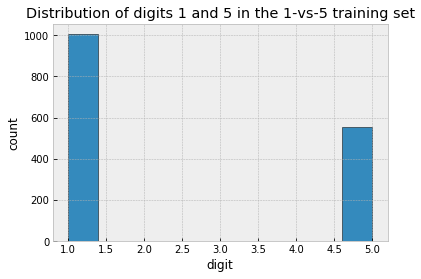

In [19]:
# Consider 1 vs 5 classifier
# We choose only rows with digits == 1 or digits == 5
df_train[df_train['digit'] == 1]
df_train[df_train['digit'] == 5]

# Append a column y with labels y=+1 for digit==1
ones = df_train[df_train['digit'] == 1].assign(y = np.ones(df_train[df_train['digit'] == 1].shape[0]))
print("Number of rows and columns for 'ones' dataframe: ", ones.shape)

# Append a column y with labels y=-1 for digit==5
# https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html
fives = df_train[df_train['digit'] == 5].assign(y = -np.ones(df_train[df_train['digit'] == 5].shape[0]))
print("Number of rows and columns for 'fives' dataframe: ", fives.shape)

# Glue together the dataframes for ones and fives
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
df_1_vs_5 = ones.append(fives, ignore_index=True)
print("Number of rows and columns of 1-vs-5 dataframe: ", df_1_vs_5.shape, end='\n\n')

print("- First five rows of 1-vs-5 dataframe:\n")
print(df_1_vs_5.head(5), end='\n\n')

print("- Last five rows of 1-vs-5 dataframe:\n")
print(df_1_vs_5.tail(5), end='\n\n')

print("- Statistical information about 1-vs-5 dataframe:\n")
print(df_1_vs_5.describe(), end='\n\n')

plt.hist(df_1_vs_5['digit'], edgecolor = 'black')
plt.title('Distribution of digits 1 and 5 in the 1-vs-5 training set')
plt.xlabel('digit')
plt.ylabel('count')
plt.show()

## 5.3 Extracting the training data and the labels

In [20]:
# Training data
X_train_1_vs_5 = np.c_[df_1_vs_5['intensity'], df_1_vs_5['symmetry']]
print(X_train_1_vs_5.shape)

# labels
y_train_1_vs_5 = np.array(df_1_vs_5['y'])
print(y_train_1_vs_5.shape)

(1561, 2)
(1561,)


**Note**: I'm printing the shapes of the matrices to check if I have extracted the data correctly.

## 5.4 Exploring multiple choice answers 5[a] and 5[b]

C = 0.001 => 		 num support vectors = 76
C = 0.01 => 		 num support vectors = 34
C = 0.1 => 		 num support vectors = 24
C = 1 => 		 num support vectors = 24


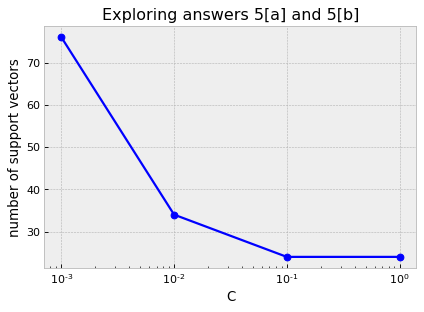

In [21]:
# explore Option 5[a] and 5[b]

fig5 = plt.figure(5, dpi = 80)
C_values = []
num_support_values = []

for C in [0.001, 0.01, 0.1, 1]:
    clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
    clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)
    print("C = {} => \t\t num support vectors = {}".format(C, sum(clf_1_vs_5.n_support_)))
    C_values.append(C)
    num_support_values.append(sum(clf_1_vs_5.n_support_))
    
    
#plt.plot(C_values, num_support_values, 'bo-')
plt.semilogx(C_values, num_support_values, 'bo-')

plt.xlabel('C')
plt.ylabel('number of support vectors')
plt.title('Exploring answers 5[a] and 5[b]')
plt.show()

**Result**: This excludes option 5[a] and 5[b].

## 5.5 Reading the TEST SET

In [22]:
# Explore Option 5[c]
# E_out goes down when C goes up ???

# Let's first read in the test set
df_test = pd.read_csv('features.test', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)

print("- Printing the first five rows of the test set:\n")
print(df_test.head(5))

print("\n\n- Some statistical information about the test set:\n")
print(df_test.describe())

print("\n\n- Number of rows and columns in the test set table:", df_test.shape)

print("\n\n- Number of rows with digit 1:", df_test[df_test['digit'] == 1].shape[0])
print("- Number of rows with digit 5:", df_test[df_test['digit'] == 5].shape[0])

- Printing the first five rows of the test set:

   digit  intensity  symmetry
0    9.0   0.272178 -4.847937
1    6.0   0.265133 -5.102000
2    3.0   0.335926 -2.921562
3    6.0   0.264850 -4.156625
4    6.0   0.345338 -6.718438


- Some statistical information about the test set:

             digit    intensity     symmetry
count  2007.000000  2007.000000  2007.000000
mean      3.850523     0.267609    -3.450593
std       3.018484     0.099506     1.479704
min       0.000000     0.057043    -7.700000
25%       1.000000     0.191987    -4.482000
50%       4.000000     0.256168    -3.605625
75%       6.000000     0.332122    -2.597500
max       9.000000     0.642658    -0.189062


- Number of rows and columns in the test set table: (2007, 3)


- Number of rows with digit 1: 264
- Number of rows with digit 5: 160


## 5.6 Preparing the test data for the 1-vs-5 classifier

We consider the **1-vs-5 classifier**.

Number of rows and columns for 'ones_test' dataframe:  (264, 4)
Number of rows and columns for 'fives_test' dataframe:  (160, 4)
Number of rows and columns in the dataframe (424, 4)


- First five rows of 1_vs_5_test dataframe:

   digit  intensity  symmetry    y
0    1.0   0.159934 -1.742000  1.0
1    1.0   0.124609 -0.474438  1.0
2    1.0   0.219117 -0.904500  1.0
3    1.0   0.244779 -2.505625  1.0
4    1.0   0.105563 -0.218562  1.0

- Last five rows of 1_vs_5_test dataframe:

     digit  intensity  symmetry    y
419    5.0   0.324154 -5.089062 -1.0
420    5.0   0.360320 -5.737500 -1.0
421    5.0   0.445924 -5.343562 -1.0
422    5.0   0.384980 -5.086000 -1.0
423    5.0   0.339586 -4.722875 -1.0

- Statistical information about 1_vs_5_test dataframe:

            digit   intensity    symmetry           y
count  424.000000  424.000000  424.000000  424.000000
mean     2.509434    0.211037   -2.325467    0.245283
std      1.941194    0.095587    2.081785    0.970597
min      1.000000    

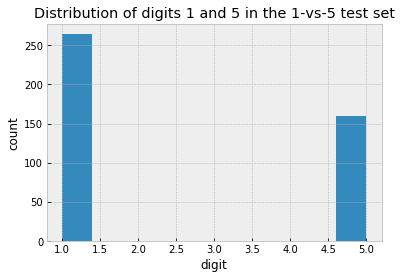

In [23]:
# Consider test set for 1-vs-5 classifier

# Append a column y with labels y=+1 for digit==1
ones_test = df_test[df_test['digit'] == 1].assign(y = np.ones(df_test[df_test['digit'] == 1].shape[0]))
print("Number of rows and columns for 'ones_test' dataframe: ", ones_test.shape)

# Append a column y with labels y=-1 for digit==5
# https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html
fives_test = df_test[df_test['digit'] == 5].assign(y = -np.ones(df_test[df_test['digit'] == 5].shape[0]))
print("Number of rows and columns for 'fives_test' dataframe: ", fives_test.shape)

# Glue together the dataframes ones_test and fives_test
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
df_test_1_vs_5 = ones_test.append(fives_test, ignore_index=True)

print("Number of rows and columns in the dataframe", df_test_1_vs_5.shape)

print("\n\n- First five rows of 1_vs_5_test dataframe:\n")
print(df_test_1_vs_5.head(5), end='\n\n')

print("- Last five rows of 1_vs_5_test dataframe:\n")
print(df_test_1_vs_5.tail(5), end='\n\n')

print("- Statistical information about 1_vs_5_test dataframe:\n")
print(df_test_1_vs_5.describe(), end='\n\n')


plt.hist(df_test_1_vs_5['digit'])
plt.title("Distribution of digits 1 and 5 in the 1-vs-5 test set")
plt.xlabel('digit')
plt.ylabel('count')
plt.show()

In [24]:
# Create X_test
X_test_1_vs_5 = np.c_[df_test_1_vs_5['intensity'], df_test_1_vs_5['symmetry']]
print("Number of rows and columns in X_test_1_vs_5: ", X_test_1_vs_5.shape)

y_test_1_vs_5 = np.array(df_test_1_vs_5['y'])
print("Number of rows and columns in y_test_1_vs_5: ", y_test_1_vs_5.shape)

Number of rows and columns in X_test_1_vs_5:  (424, 2)
Number of rows and columns in y_test_1_vs_5:  (424,)


## 5.7 Let's explore Option 5[c]

We will plot $E_{out}$ as a function of $C$.

C = 0.001 => 		E_out = 0.01650943396226415
C = 0.01 => 		E_out = 0.018867924528301886
C = 0.1 => 		E_out = 0.018867924528301886
C = 1 => 		E_out = 0.018867924528301886


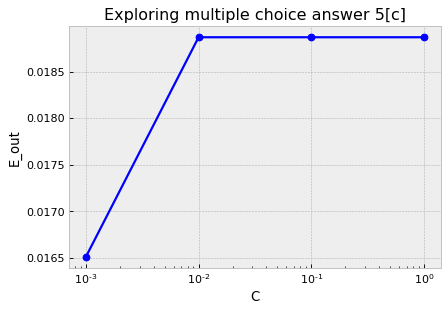

In [25]:
# explore Option 5[c]

fig6 = plt.figure(6, dpi = 80)
C_values = []
E_out_values = []
N_test = X_test_1_vs_5.shape[0]

for C in [0.001, 0.01, 0.1, 1]:
    
    # setting up the classifier
    clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
    clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)
    
    # predictions made by classifier
    y_predict_test_1_vs_5 = clf_1_vs_5.predict(X_test_1_vs_5)
    
    # E_out is the fraction of mismatches on the test set
    E_out = sum(y_test_1_vs_5 != y_predict_test_1_vs_5) / N_test
    
    print("C = {} => \t\tE_out = {}".format(C, E_out))
    C_values.append(C)
    E_out_values.append(E_out)
    
    
# Use logarithmic scale on x-axis
plt.semilogx(C_values, E_out_values, 'bo-')

plt.xlabel('C')
plt.ylabel('E_out')
plt.title('Exploring multiple choice answer 5[c]')
plt.show()

### Result: This excludes Option 5[c]

## Explore Option 5[d]

Does the maximum C achieve the lowest $E_{in}$ ?

C = 0.001 => 		E_in = 0.004484304932735426
C = 0.01 => 		E_in = 0.004484304932735426
C = 0.1 => 		E_in = 0.004484304932735426
C = 1 => 		E_in = 0.0032030749519538757


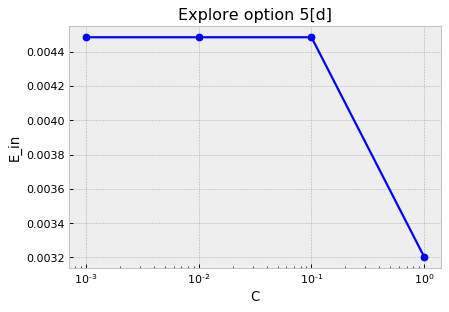

In [26]:
# explore Option 5[c]

fig7 = plt.figure(7, dpi = 80)
C_values = []
E_in_values = []
N_train = X_train_1_vs_5.shape[0]

for C in [0.001, 0.01, 0.1, 1]:
    clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
    clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)
    
    y_predict_train_1_vs_5 = clf_1_vs_5.predict(X_train_1_vs_5)
    E_in = sum(y_train_1_vs_5 != y_predict_train_1_vs_5) / N_train
    
    print("C = {} => \t\tE_in = {}".format(C, E_in))
    C_values.append(C)
    E_in_values.append(E_in)
    
    
plt.semilogx(C_values, E_in_values, 'bo-')

plt.xlabel('C')
plt.ylabel('E_in')
plt.title('Explore option 5[d]')
plt.show()

## Result for Problem 5

The maximum $C$ achieves the lowest $E_{in}$, thus the answer is **5[d]**.

# Problem 6

Compare $Q = 2$ with $Q = 5$.

## Explore 6[a] and 6[c]

Q = 2, C = 0.0001 => 		E_in = 0.008968609865470852
Q = 2, C = 0.001 => 		E_in = 0.004484304932735426
Q = 2, C = 0.01 => 		E_in = 0.004484304932735426
Q = 2, C = 0.1 => 		E_in = 0.004484304932735426
Q = 2, C = 1 => 		E_in = 0.0032030749519538757

Q = 5, C = 0.0001 => 		E_in = 0.004484304932735426
Q = 5, C = 0.001 => 		E_in = 0.004484304932735426
Q = 5, C = 0.01 => 		E_in = 0.003843689942344651
Q = 5, C = 0.1 => 		E_in = 0.0032030749519538757
Q = 5, C = 1 => 		E_in = 0.0032030749519538757



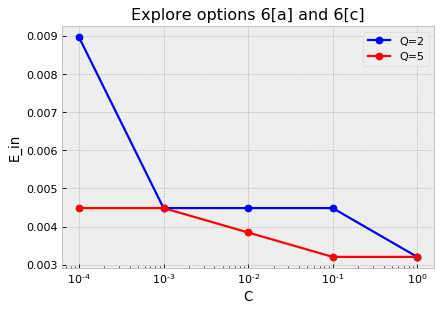

In [27]:
# train two classifiers , Q = 2 and Q = 5 respectively
# plot E_in vs C

# explore Option 5[c]

fig8 = plt.figure(8, dpi = 80)
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
N_train = X_train_1_vs_5.shape[0]

E_in_values = [[],[]]  # E_in_values for Q = 2 and Q = 5 respectively
Q_values = [2, 5]


for i in range(2):
    for C in C_values:
        
        # sweep values for C and Q
        clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = Q_values[i], coef0 = 1, gamma = 1)
        clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)

        y_predict_train_1_vs_5 = clf_1_vs_5.predict(X_train_1_vs_5)
        E_in = sum(y_train_1_vs_5 != y_predict_train_1_vs_5) / N_train

        print("Q = {}, C = {} => \t\tE_in = {}".format(Q_values[i], C, E_in))
        E_in_values[i].append(E_in)
    print()
    
    
plt.semilogx(C_values, E_in_values[0], 'bo-', label='Q=2')
plt.semilogx(C_values, E_in_values[1], 'ro-', label='Q=5')


plt.xlabel('C')
plt.ylabel('E_in')
plt.title('Explore options 6[a] and 6[c]')
plt.legend()
plt.show()

At $C = 0.0001$ $E_{in}$ is **not** higher at $Q = 5$, so we can exclude Option 6[a].

At $C = 0.01$ $E_{in}$ is **not** higher at $Q = 5$, so we can exclude Option 6[c].

## Explore 6[d]

Look at $E_{out}$ for $Q = 2$ and $Q = 5$ respectively.

Q = 2, C = 0.0001 => 		E_out = 0.01650943396226415
Q = 2, C = 0.001 => 		E_out = 0.01650943396226415
Q = 2, C = 0.01 => 		E_out = 0.018867924528301886
Q = 2, C = 0.1 => 		E_out = 0.018867924528301886
Q = 2, C = 1 => 		E_out = 0.018867924528301886

Q = 5, C = 0.0001 => 		E_out = 0.018867924528301886
Q = 5, C = 0.001 => 		E_out = 0.02122641509433962
Q = 5, C = 0.01 => 		E_out = 0.02122641509433962
Q = 5, C = 0.1 => 		E_out = 0.018867924528301886
Q = 5, C = 1 => 		E_out = 0.02122641509433962



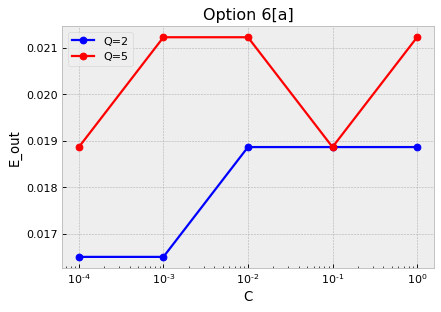

In [28]:
# train two classifiers , Q = 2 and Q = 5 respectively
# plot E_out vs C

# explore Option 6[d]

fig9 = plt.figure(9, dpi = 80)
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
N_test = X_test_1_vs_5.shape[0]

E_out_values = [[],[]]  # E_in_values for Q = 2 and Q = 5 respectively
Q_values = [2, 5]

for i in range(2):
    for C in C_values:
        
        # train using the training set!
        clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = Q_values[i], coef0 = 1, gamma = 1)
        clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)

        # predict using the test set!
        y_predict_test_1_vs_5 = clf_1_vs_5.predict(X_test_1_vs_5)
        E_out = sum(y_test_1_vs_5 != y_predict_test_1_vs_5) / N_test

        print("Q = {}, C = {} => \t\tE_out = {}".format(Q_values[i], C, E_out))
        E_out_values[i].append(E_out)
    print()
    

plt.semilogx(C_values, E_out_values[0], 'bo-', label='Q=2')
plt.semilogx(C_values, E_out_values[1], 'ro-', label='Q=5')


plt.xlabel('C')
plt.ylabel('E_out')
plt.title('Option 6[a]')
plt.legend()
plt.show()

At $C = 1$, $E_{out}$ is **not** lower for $Q = 5$, so we can exclude 6[d].

## Explore Option 6[b]

Plot the number of support vectors $Q = 2$ and $Q = 5$.

Q = 2, C = 0.0001 => 		num_support_vectors = 236
Q = 2, C = 0.001 => 		num_support_vectors = 76
Q = 2, C = 0.01 => 		num_support_vectors = 34
Q = 2, C = 0.1 => 		num_support_vectors = 24
Q = 2, C = 1 => 		num_support_vectors = 24

Q = 5, C = 0.0001 => 		num_support_vectors = 26
Q = 5, C = 0.001 => 		num_support_vectors = 25
Q = 5, C = 0.01 => 		num_support_vectors = 23
Q = 5, C = 0.1 => 		num_support_vectors = 25
Q = 5, C = 1 => 		num_support_vectors = 21



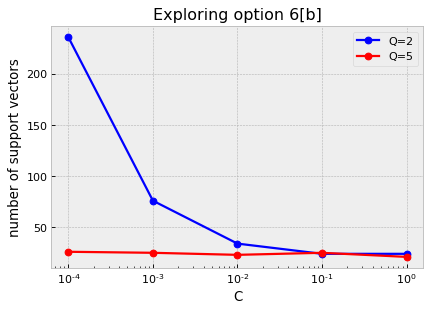

In [29]:
# train two classifiers , Q = 2 and Q = 5 respectively
# plot number of support vectors

# explore Option 6[d]

fig10 = plt.figure(10, dpi = 80)
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
N_train = X_train_1_vs_5.shape[0]

num_support_vectors_values = [[],[]]  # E_in_values for Q = 2 and Q = 5 respectively
Q_values = [2, 5]

for i in range(2):
    for C in C_values:
        # train using the training set!
        clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = Q_values[i], coef0 = 1, gamma = 1)
        clf_1_vs_5.fit(X_train_1_vs_5,  y_train_1_vs_5)
        num_support_vectors = sum(clf_1_vs_5.n_support_)
        
        print("Q = {}, C = {} => \t\tnum_support_vectors = {}".format(Q_values[i], C, num_support_vectors))
        num_support_vectors_values[i].append(num_support_vectors)
    print()
    
    

plt.semilogx(C_values, num_support_vectors_values[0], 'bo-', label='Q=2')
plt.semilogx(C_values, num_support_vectors_values[1], 'ro-', label='Q=5')



plt.xlabel('C')
plt.ylabel('number of support vectors')
plt.title('Exploring option 6[b]')
plt.legend()
plt.show()

## Result for Problem 6

The number of support vectors at $C = 0.001$ is lower for $Q = 5$, therefore answer **6[b]** is correct.

# Problem 7 and 8 are at the end of this notebook

# Problem 9 - RBF Kernel

For an RBF Kernel determine the C that achieves the lowest $E_{in}$.

RBF classifier, 1 vs 5:
C = 0.01 => 		E_in = 0.003843689942344651
C = 1 => 		E_in = 0.004484304932735426
C = 100 => 		E_in = 0.0032030749519538757
C = 10000 => 		E_in = 0.0025624599615631004
C = 1000000 => 		E_in = 0.0006406149903907751



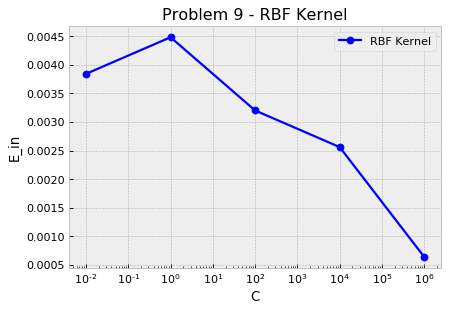

In [30]:
fig11 = plt.figure(11, dpi = 80)
C_values = [10**k for k in [-2, 0, 2, 4, 6]]
N_train = X_train_1_vs_5.shape[0]
E_in_values = []

print("RBF classifier, 1 vs 5:")
for C in C_values:
    clf_1_vs_5_rbf = svm.SVC(C, kernel = 'rbf', gamma = 1)
    clf_1_vs_5_rbf.fit(X_train_1_vs_5,  y_train_1_vs_5)

    y_predict_train_1_vs_5_rbf = clf_1_vs_5_rbf.predict(X_train_1_vs_5)
    E_in = sum(y_train_1_vs_5 != y_predict_train_1_vs_5_rbf) / N_train

    print("C = {} => \t\tE_in = {}".format(C, E_in))
    E_in_values.append(E_in)
print()
    
    
#plt.plot(C_values, E_in_values, 'bo-', label='RBF Kernel')
plt.semilogx(C_values, E_in_values, 'bo-', label='RBF Kernel')

plt.xlabel('C')
plt.ylabel('E_in')
plt.title('Problem 9 - RBF Kernel')
plt.legend()
plt.show()

## Result for Problem 9

The lowest $E_{in}$ is achieved for the highest value of $C = 10^6$ which is to be expected if you recall that $C$ is the penalty factor. For $C = \infty$ we had the hard margin case with zero in-sample error. The correct answer is therefore **9[e]**.

# Problem 10

For an RBF-Kernel determine the $C$ that achieves the lowest $E_{out}$.

RBF classifier, 1 vs 5:
C = 0.01 => 		E_out = 0.02358490566037736
C = 1 => 		E_out = 0.02122641509433962
C = 100 => 		E_out = 0.018867924528301886
C = 10000 => 		E_out = 0.02358490566037736
C = 1000000 => 		E_out = 0.02358490566037736



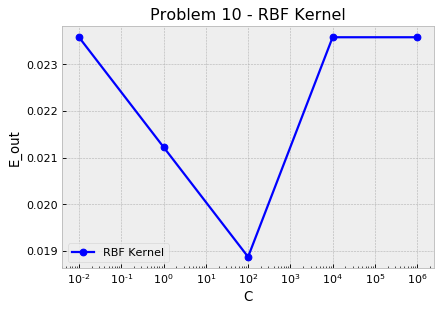

In [31]:
fig11 = plt.figure(11, dpi = 80)
C_values = [10**k for k in [-2, 0, 2, 4, 6]]
N_test = X_test_1_vs_5.shape[0]
E_out_values = []

print("RBF classifier, 1 vs 5:")
for C in C_values:
    clf_1_vs_5_rbf = svm.SVC(C, kernel = 'rbf', gamma = 1)
    clf_1_vs_5_rbf.fit(X_train_1_vs_5,  y_train_1_vs_5)

    y_predict_test_1_vs_5_rbf = clf_1_vs_5_rbf.predict(X_test_1_vs_5)
    E_out = sum(y_test_1_vs_5 != y_predict_test_1_vs_5_rbf) / N_test

    print("C = {} => \t\tE_out = {}".format(C, E_out))
    E_out_values.append(E_out)
print()
    
    
plt.semilogx(C_values, E_out_values, 'bo-', label='RBF Kernel')

plt.xlabel('C')
plt.ylabel('E_out')
plt.title('Problem 10 - RBF Kernel')
plt.legend()
plt.show()

## Result for Problem 10

The lowest $E_{out}$ is achieved for $C = 100$, thus answer **10[c]** is correct.

# Problem 7 - Cross Validation

## 7.1 Shuffle the data

We are going to use the `np.random.shuffle` function. Let's first test if it indeed shuffles the rows of a matrix.

In [32]:
# test for shuffling

# construct a data set
a = np.arange(10)
b = a*a
X = np.c_[a,b]
print(X)

# shuffle the rows
print("\nshuffling the rows:")
np.random.shuffle(X)
print(X)

[[ 0  0]
 [ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 6 36]
 [ 7 49]
 [ 8 64]
 [ 9 81]]

shuffling the rows:
[[ 4 16]
 [ 1  1]
 [ 9 81]
 [ 6 36]
 [ 5 25]
 [ 2  4]
 [ 0  0]
 [ 7 49]
 [ 8 64]
 [ 3  9]]


## 7.2 Use `np.array_split`

We can split a numpy array into almost equally parts using the function `np.array_split` .

In [33]:
# test for array_split
a = np.arange(10)
b = a*a
X = np.c_[a,b]
print(X, end='\n\n')


partitions = np.array_split(X, 3)

print("Let's partition the table into 3 almost equally sized chunks:\n")
for p in partitions:
    print(p,end='\n\n')

[[ 0  0]
 [ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 6 36]
 [ 7 49]
 [ 8 64]
 [ 9 81]]

Let's partition the table into 3 almost equally sized chunks:

[[0 0]
 [1 1]
 [2 4]
 [3 9]]

[[ 4 16]
 [ 5 25]
 [ 6 36]]

[[ 7 49]
 [ 8 64]
 [ 9 81]]



## 7.3 Glueing together a matrix and a vector

Let's test how to glue together a matrix and a vector using `np.c_[]`.

In [34]:
# matrix
XX = np.array([[1,4], [2,5], [3,6]])
print(XX, end='\n\n')

# vector
aa = np.array([7,8,9])
print(aa, end='\n\n')

# glue vector to matrix
XX_aa = np.c_[XX, aa]
print(XX_aa, end='\n\n')

[[1 4]
 [2 5]
 [3 6]]

[7 8 9]

[[1 4 7]
 [2 5 8]
 [3 6 9]]



## Glue X_train_1_vs_5 and y_train_1_vs_5

In [35]:
# glue X_train_1_vs_5 and y_train_1_vs_5
print("Five first rows of glued_X_y_train_1_vs_5:")
glued_X_y_train_1_vs_5 = np.c_[X_train_1_vs_5, y_train_1_vs_5]
print(glued_X_y_train_1_vs_5[:5, :])
print(glued_X_y_train_1_vs_5.shape, end='\n\n')

# shuffle the data
print("Five first rows after shuffling glued_X_y_train_1_vs_5:")
np.random.shuffle(glued_X_y_train_1_vs_5)
print(glued_X_y_train_1_vs_5[:5, :])
print(glued_X_y_train_1_vs_5.shape, end='\n\n')

Five first rows of glued_X_y_train_1_vs_5:
[[ 0.12304297 -0.707875    1.        ]
 [ 0.11385937 -0.931375    1.        ]
 [ 0.11537109 -0.386       1.        ]
 [ 0.10228125 -0.3788125   1.        ]
 [ 0.14204297 -1.8194375   1.        ]]
(1561, 3)

Five first rows after shuffling glued_X_y_train_1_vs_5:
[[ 0.33233008 -5.5936875  -1.        ]
 [ 0.2179043  -4.7313125  -1.        ]
 [ 0.09261719 -0.48525     1.        ]
 [ 0.11981641 -0.8105625   1.        ]
 [ 0.2314668  -4.4350625  -1.        ]]
(1561, 3)



## 7.4 Partitioning the indices

Instead of partitioning the whole matrix of our data set we partition the indices array into $10$ almost equally sized chunks using `np.array_split`, [see the documentation here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.array_split.html). 

For each chunk we store the minimum and maximum index, so we create a list with the ranges of each chunk.

In [36]:
# partition the indices into 10 parts
k_fold = 10
indices = np.arange(glued_X_y_train_1_vs_5.shape[0])
partition_indices = np.array_split(indices, k_fold)
#print(*partition_indices, sep='\n\n')

# for each chunk we store minimum and maximum index
print("This list contains the ranges of each indices chunk.")
partition_ranges = [(min(p), max(p)) for p in partition_indices]
print(partition_ranges, end='\n\n')

This list contains the ranges of each indices chunk.
[(0, 156), (157, 312), (313, 468), (469, 624), (625, 780), (781, 936), (937, 1092), (1093, 1248), (1249, 1404), (1405, 1560)]



## 7.5 Glueing together matrix parts by rows

The idea is that we use the indices ranges to cut out one part, which will be the validation set. The remaining two parts will then be glued together to serve as training set with reduced size.

In [37]:
# test gluing together two matrix parts
print("This is our test matrix:")
vv = np.arange(10) 
XX = np.c_[vv, vv*vv, vv+3]
print(XX, end='\n\n')

print("Let's split the matrix into three parts:")
XX_top_part = XX[0:4]
XX_middle_part = XX[4:7]
XX_bottom_part = XX[7:]

print(XX_top_part, end='\n\n')
print(XX_middle_part, end='\n\n')
print(XX_bottom_part, end='\n\n')

# testing glueing top and bottom part
print("Let's glue together the top and bottom part:")
XX_glued_top_bottom = np.r_[XX_top_part, XX_bottom_part]
print(XX_glued_top_bottom, end='\n\n')

This is our test matrix:
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

Let's split the matrix into three parts:
[[0 0 3]
 [1 1 4]
 [2 4 5]
 [3 9 6]]

[[ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]]

[[ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

Let's glue together the top and bottom part:
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]



## 7.6 Testing how to split the training set into a validation set and a reduced training set

Let's test if we can create all possible combinations for validation and reduced training set by using a loop for a test set.

In [38]:
# testing glueing with loop
# partition the data into 10 parts
print("Test set:")
vv = np.arange(10) 
XX = np.c_[vv, vv*vv, vv+3]
print(XX, end='\n\n')

k_fold = 3
indices = np.arange(XX.shape[0])
partition_indices = np.array_split(indices, k_fold)
print("\nPartitioning the indices:")
print(*partition_indices, sep='\n')

partition_ranges = [(min(p), max(p)) for p in partition_indices]
print("\n\npartition ranges:")
print(partition_ranges, end='\n\n')

# get 3-fold partitions
for min_p, max_p in partition_ranges:
    # all data except the part from min_p to max_p
    print("\nLeaving out: ", [min_p, max_p])
    D_train = np.r_[ XX[ : min_p], XX[max_p + 1 : ] ]
    print("D_train = \n", D_train)
    
    D_val = XX[min_p : max_p+1]
    print("\nD_val = \n", D_val)
    
    print('--------------------')

Test set:
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]


Partitioning the indices:
[0 1 2 3]
[4 5 6]
[7 8 9]


partition ranges:
[(0, 3), (4, 6), (7, 9)]


Leaving out:  [0, 3]
D_train = 
 [[ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

D_val = 
 [[0 0 3]
 [1 1 4]
 [2 4 5]
 [3 9 6]]
--------------------

Leaving out:  [4, 6]
D_train = 
 [[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

D_val = 
 [[ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]]
--------------------

Leaving out:  [7, 9]
D_train = 
 [[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]]

D_val = 
 [[ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]
--------------------


# Problem 8 - Preview

Out of curiosity, plot the average cross validation error over 100 runs as a function of $C$, where for each run we shuffle the data set.

C = 0.0001 => 		 E_cv_avg = 0.00972423648538298
C = 0.001 => 		 E_cv_avg = 0.004804262616364526
C = 0.01 => 		 E_cv_avg = 0.004727788665686754
C = 0.1 => 		 E_cv_avg = 0.00482373836354728
C = 1 => 		 E_cv_avg = 0.004727911154662746


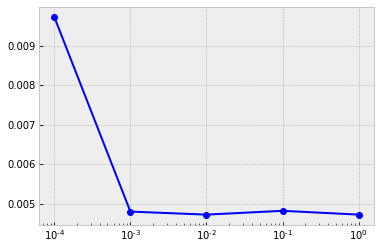

In [39]:
RUNS = 100
C_values = [10**k for k in [-4, -3, -2, -1, 0]]
E_cv_avg_values = []

#-------------------------------------------------

for C in C_values:

    E_cv_values = []    # collect E_cv of each run and use np.mean => expected E_cv
    
    # for each C value do 100 runs
    for run in range(RUNS):

        # glue X_train_1_vs_5 and y_train_1_vs_5
        glued_X_y_train_1_vs_5 = np.c_[X_train_1_vs_5, y_train_1_vs_5]

        # shuffle the data
        np.random.shuffle(glued_X_y_train_1_vs_5)

        # get 10-fold partitions
        XX = glued_X_y_train_1_vs_5
        k_fold = 10
        indices = np.arange(XX.shape[0])
        partition_indices = np.array_split(indices, k_fold)
        partition_ranges = [(min(p), max(p)) for p in partition_indices]
        
        
        e_values = []    # errors on validation sets        
        
        # Start cross validating
        for min_p, max_p in partition_ranges:
            # all data except the part from min_p to max_p
            D_train = np.r_[ XX[ : min_p], XX[max_p + 1 : ] ]
            D_val = XX[min_p : max_p+1]

            X_train = D_train[:, :2]
            y_train = D_train[:, 2]
            X_val = D_val[:, :2]
            y_val = D_val[:, 2]

            clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
            clf_1_vs_5.fit(X_train,  y_train)

            # cross validation error e_n
            y_predict_val_1_vs_5 = clf_1_vs_5.predict(X_val)
            N_val = X_val.shape[0]
            e_n = sum(y_val != y_predict_val_1_vs_5) / N_val

            e_values.append(e_n)

        # see slide 17, lecture 13
        E_cv = np.mean(e_values)
        E_cv_values.append(E_cv)
        
    E_cv_avg = np.mean(E_cv_values)
    print("C = {} => \t\t E_cv_avg = {}".format(C, E_cv_avg))
    
    E_cv_avg_values.append(E_cv_avg)
    
    #---------------
    
plt.semilogx(C_values, E_cv_avg_values, 'bo-')
plt.show()

The plot shows that over 100 runs the minimum expected cross validation error $\mathbf{E}(E_{cv})$ is close to $0.005$.
So we can already answer Problem 8 with the correct answer being **8[c]**.


## 7.7 Simulate distribution of winners

Now back to the actual **Problem 7**. Note that the plot above indicates that the winner might be $C = 0.01$.

In [40]:
RUNS = 100
C_values = [10**k for k in [-4, -3, -2, -1, 0]]
winners = []

#-------------------------------------------------

    
# do 100 runs, for each run determine which C yields the lowest cross validation error
for run in range(RUNS):

    # glue X_train_1_vs_5 and y_train_1_vs_5
    glued_X_y_train_1_vs_5 = np.c_[X_train_1_vs_5, y_train_1_vs_5]

    # shuffle the data
    np.random.shuffle(glued_X_y_train_1_vs_5)

    # get 10-fold partitions
    XX = glued_X_y_train_1_vs_5
    k_fold = 10
    indices = np.arange(XX.shape[0])
    partition_indices = np.array_split(indices, k_fold)
    partition_ranges = [(min(p), max(p)) for p in partition_indices]


    min_C = None
    min_E_cv = 2**64
    
    for C in C_values:
        
        
        # Start cross validating
        e_values = []    # errors on validation sets  
        
        for min_p, max_p in partition_ranges:
            # all data except the part from min_p to max_p
            D_train = np.r_[ XX[ : min_p], XX[max_p + 1 : ] ]
            D_val = XX[min_p : max_p+1]

            X_train = D_train[:, :2]
            y_train = D_train[:, 2]
            X_val = D_val[:, :2]
            y_val = D_val[:, 2]

            clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
            clf_1_vs_5.fit(X_train,  y_train)

            # cross validation error e_n
            y_predict_val_1_vs_5 = clf_1_vs_5.predict(X_val)
            N_val = X_val.shape[0]
            e_n = sum(y_val != y_predict_val_1_vs_5) / N_val

            e_values.append(e_n)

        # see slide 17, lecture 13
        E_cv = np.mean(e_values)
        
        if E_cv < min_E_cv:
            min_E_cv = E_cv
            min_C = C
            
    winners.append(min_C)
    
    #---------------




## 7.8 Plot distribution of winners

C = 0.0001 won 	0 times
C = 0.001 won 	45 times
C = 0.01 won 	27 times
C = 0.1 won 	12 times
C = 1 won 	16 times


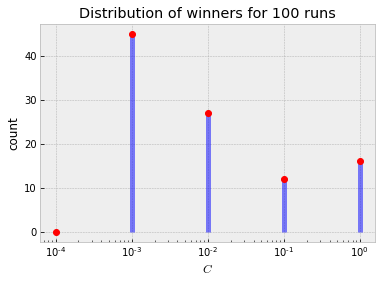

In [41]:
d_count = {C:0 for C in C_values}

for item in winners:
    d_count[item] += 1

for item, count in d_count.items():
    print("C = {} won \t{} times".format(item, count))

y_values = d_count.values()



fig, ax = plt.subplots(1, 1)    
ax.vlines(C_values, 0, y_values, colors='b', lw=5, alpha=0.5)

    
plt.semilogx(C_values, y_values, 'ro')
plt.title('Distribution of winners for 100 runs')
plt.xlabel('$C$')
plt.ylabel('count')
plt.show()

## Result for Problem 7

The classifier with $C = 0.001$ hast the most wins over 100 runs. This is interesting because $C = 0.01$ yields the lowest  average value of $E_{cv}$.

## Addendum for Problem 8

We again plot the average cross validation error as a function of $C$, however this time we change the order of the loops to ensure that the different $C$ values 'see' the same shuffled data set. 

In contrast, previously we generated 100 new shuffled data sets for each $C$.

C = 0.0001 => 	E_cv_avg = 0.009787889923240239
C = 0.001 => 	E_cv_avg = 0.004791727911154662
C = 0.01 => 	E_cv_avg = 0.004676465784746039
C = 0.1 => 	E_cv_avg = 0.004747060264576187
C = 1 => 	E_cv_avg = 0.004894373673036092


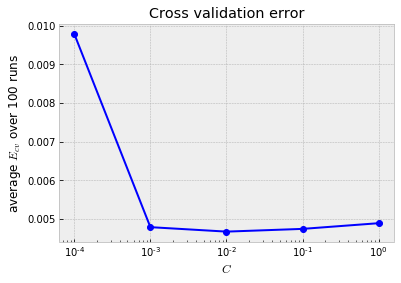

In [42]:
# I want to switch order of loops from Problem 7, because previously each of the C values 
# gets a different permutation of the the data set.

RUNS = 100
C_values = [10**k for k in [-4, -3, -2, -1, 0]]
E_cv_avg_values = []   # for each C_value store the average E_cv
E_cv_values = [[] for _ in range(5)]    # collect E_cv of each run and use np.mean => expected E_cv

#-------------------------------------------------

    
# for each C value do 100 runs
for run in range(RUNS):

    # glue X_train_1_vs_5 and y_train_1_vs_5
    glued_X_y_train_1_vs_5 = np.c_[X_train_1_vs_5, y_train_1_vs_5]

    # shuffle the data
    np.random.shuffle(glued_X_y_train_1_vs_5)

    # get 10-fold partitions
    XX = glued_X_y_train_1_vs_5
    k_fold = 10
    indices = np.arange(XX.shape[0])
    partition_indices = np.array_split(indices, k_fold)
    partition_ranges = [(min(p), max(p)) for p in partition_indices]

    
    for index, C in enumerate(C_values):

        e_values = []    # errors on validation sets        
        
        # Start cross validating
        for min_p, max_p in partition_ranges:
            # all data except the part from min_p to max_p
            D_train = np.r_[ XX[ : min_p], XX[max_p + 1 : ] ]
            D_val = XX[min_p : max_p+1]

            X_train = D_train[:, :2]
            y_train = D_train[:, 2]
            X_val = D_val[:, :2]
            y_val = D_val[:, 2]

            clf_1_vs_5 = svm.SVC(C, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
            clf_1_vs_5.fit(X_train,  y_train)

            # cross validation error e_n
            y_predict_val_1_vs_5 = clf_1_vs_5.predict(X_val)
            N_val = X_val.shape[0]
            e_n = sum(y_val != y_predict_val_1_vs_5) / N_val

            e_values.append(e_n)

        # see slide 17, lecture 13
        E_cv = np.mean(e_values)
        E_cv_values[index].append(E_cv)
        #print(E_cv_values)        
        #print("index = {}, E_cv = {}".format(index, E_cv))



for i in range(5):
    E_cv_avg_values.append(np.mean(E_cv_values[i]))

#---------------

for C, E_cv_avg in zip(C_values, E_cv_avg_values):
    print("C = {} => \tE_cv_avg = {}".format(C, E_cv_avg))

plt.semilogx(C_values, E_cv_avg_values, 'bo-')
plt.xlabel("$C$")
plt.ylabel("average $E_{cv}$ over 100 runs")
plt.title("Cross validation error")
plt.show()

## Result:

The graph looks similar to the one we created before where we shuffled the data independently for each $C$. Here, we use the same shuffled data for each $C$.

## Explanation for why the winning classifier doesn't yield the lowest average $E_{in}$ ?

I want to explore a little why the winning classifier with $C=0.001$ does not yield the lowest average $E_{in}$. The lowest average $E_{in}$ is achieved for $C=0.01$.

   C=0.0001   C=0.001    C=0.01     C=0.1       C=1
0  0.010252  0.005124  0.004487  0.005128  0.004487
1  0.009611  0.004483  0.004483  0.004483  0.005124
2  0.010248  0.004483  0.004483  0.005124  0.005124
3  0.010252  0.004487  0.004487  0.004487  0.004487
4  0.008970  0.004487  0.004487  0.004483  0.004487



         C=0.0001     C=0.001      C=0.01       C=0.1         C=1
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     0.009788    0.004792    0.004676    0.004747    0.004894
std      0.000447    0.000321    0.000309    0.000418    0.000579
min      0.008329    0.004475    0.003846    0.003842    0.003838
25%      0.009603    0.004486    0.004483    0.004483    0.004486
50%      0.009615    0.004487    0.004487    0.004802    0.005124
75%      0.010248    0.005124    0.005120    0.005124    0.005128
max      0.010256    0.005128    0.005128    0.005128    0.005769
----------------------------


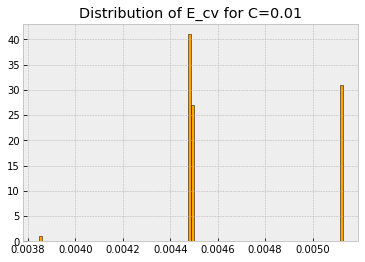

count    100.000000
mean       0.004676
std        0.000309
min        0.003846
25%        0.004483
50%        0.004487
75%        0.005120
max        0.005128
Name: C=0.01, dtype: float64
----------------------------


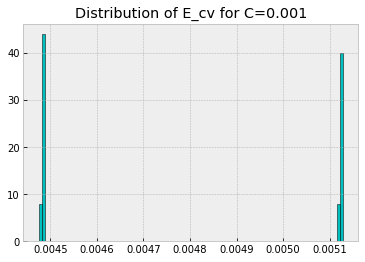

count    100.000000
mean       0.004792
std        0.000321
min        0.004475
25%        0.004486
50%        0.004487
75%        0.005124
max        0.005128
Name: C=0.001, dtype: float64
----------------------------


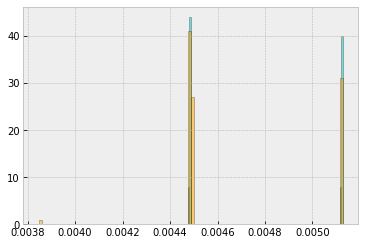

count    100.000000
mean       0.004792
std        0.000321
min        0.004475
25%        0.004486
50%        0.004487
75%        0.005124
max        0.005128
Name: C=0.001, dtype: float64


In [43]:
# E_cv_for_each_C is a list of arrays, where each array contains the E_cv values
# of each C over 100 runs
E_cv_for_each_C = np.array(E_cv_values).T
df_whole = pd.DataFrame(E_cv_for_each_C, columns = ['C=0.0001', 'C=0.001', 'C=0.01', 'C=0.1', 'C=1'])
print(df_whole.head(5))
print('\n\n')
print(df_whole.describe())


print('----------------------------')

NUMBER_OF_BINS = 100

hist_C_01 = plt.hist(df_whole['C=0.01'], edgecolor = 'black', color = 'orange', bins = NUMBER_OF_BINS)
plt.title('Distribution of E_cv for C=0.01')
#plt.xscale('log') 
plt.show()
print(df_whole['C=0.01'].describe())

print('----------------------------')

hist_C_001 = plt.hist(df_whole['C=0.001'], edgecolor = 'black', color = 'c', bins = NUMBER_OF_BINS)
plt.title('Distribution of E_cv for C=0.001')
#plt.xscale('log') 
plt.show()


print(df_whole['C=0.001'].describe())

print('----------------------------')


plt.hist(df_whole['C=0.001'], edgecolor = 'black', bins = NUMBER_OF_BINS, color = 'c', alpha = 0.5, label='C=0.001')
plt.hist(df_whole['C=0.01'], edgecolor = 'black', bins = NUMBER_OF_BINS, color = 'orange', alpha = 0.5, label='C=0.01')
#plt.xscale('log') 
plt.show()
plt.legend()
print(df_whole['C=0.001'].describe())


## Conclusion

Well, I don't have any conclusions. I can't see from the data why the classifier with the lowest average $E_{cv}$ is not the winner.

Let's try to dig a little deeper by looking at every single value of $E_cv$ over the 100 runs.

In [44]:
# distribution of E_cv values for C = 0.01
E_cv_values_C_0_01 = E_cv_values[1]
dict_C_0_01 = {}

for E_cv in E_cv_values_C_0_01:
    if not E_cv in dict_C_0_01:
        dict_C_0_01[E_cv] = 0
    dict_C_0_01[E_cv] += 1
    
sorted_list_E_cv_C_0_01 = sorted(dict_C_0_01.items(), key=lambda t: t[0])
print("For C = 0.01:")
print("(E_cv, occurence):\n")
print(*sorted_list_E_cv_C_0_01[:10], sep='\n')

For C = 0.01:
(E_cv, occurence):

(0.0044749305895802702, 1)
(0.0044790135554466761, 5)
(0.0044790135554466769, 2)
(0.004483096521313081, 4)
(0.0044830965213130819, 13)
(0.0044871794871794869, 27)
(0.0051159562306059125, 1)
(0.0051200391964723166, 3)
(0.0051200391964723174, 4)
(0.0051241221623387224, 22)


In [45]:
# distribution of E_cv values for C = 0.001
E_cv_values_C_0_001 = E_cv_values[2]
dict_C_0_001 = {}

for E_cv in E_cv_values_C_0_001:
    if not E_cv in dict_C_0_001:
        dict_C_0_001[E_cv] = 0
    dict_C_0_001[E_cv] += 1
    
sorted_list_E_cv_C_0_001 = sorted(dict_C_0_001.items(), key=lambda t: t[0])
print("For C = 0.001:")
print("(E_cv, occurence):\n")
print(*sorted_list_E_cv_C_0_001[:10], sep='\n')

For C = 0.001:
(E_cv, occurence):

(0.0038461538461538464, 1)
(0.0044790135554466761, 4)
(0.0044790135554466769, 3)
(0.004483096521313081, 10)
(0.0044830965213130819, 24)
(0.0044871794871794869, 27)
(0.0051159562306059116, 1)
(0.0051159562306059125, 1)
(0.0051200391964723166, 3)
(0.0051200391964723174, 3)


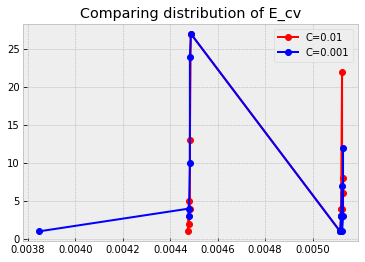

In [46]:
x_values_C_0_01 = [tup[0] for tup in sorted_list_E_cv_C_0_01]
y_values_C_0_01 = [tup[1] for tup in sorted_list_E_cv_C_0_01]
plt.plot(x_values_C_0_01, y_values_C_0_01, 'ro-', label='C=0.01')

x_values_C_0_001 = [tup[0] for tup in sorted_list_E_cv_C_0_001]
y_values_C_0_001 = [tup[1] for tup in sorted_list_E_cv_C_0_001]
plt.plot(x_values_C_0_001, y_values_C_0_001, 'bo-', label='C=0.001')


plt.title("Comparing distribution of E_cv")
plt.legend()
plt.show()

Unfortunately, I still can't make any conclusions.

## Update: KFold from scikit-learn to split indices

I just learned that there is a class called `KFold` to split indices into almost equally sized chunks.

In [47]:
# testing k_fold
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

import numpy as np
from sklearn.model_selection import KFold
vv = np.arange(10) 
X = np.c_[vv, vv*vv, vv+3]
y = np.arange(10)

print("Training set X:")
print(X)

print("\nLabels y:")
print(y)
print("\n")

kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf, end='\n\n')  

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "VAL:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X[train_index, :], end='\n\n')
    
# interesting, I could have used this!
#print(X[np.array([0,2,4]),1:3])


Training set X:
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

Labels y:
[0 1 2 3 4 5 6 7 8 9]


KFold(n_splits=3, random_state=None, shuffle=False)

TRAIN: [4 5 6 7 8 9] VAL: [0 1 2 3]
[[ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

TRAIN: [0 1 2 3 7 8 9] VAL: [4 5 6]
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 7 49 10]
 [ 8 64 11]
 [ 9 81 12]]

TRAIN: [0 1 2 3 4 5 6] VAL: [7 8 9]
[[ 0  0  3]
 [ 1  1  4]
 [ 2  4  5]
 [ 3  9  6]
 [ 4 16  7]
 [ 5 25  8]
 [ 6 36  9]]

